## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset
### Using the Titanic dataset from a public GitHub repo

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

## 2. Inspect the first few rows of the data

In [3]:
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

## 3. Key summary statistics

In [4]:
print("\nSummary statistics:")
stats = df.describe(include='all')
print(stats)


Summary statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch

## 4. Checking for missing values

In [5]:
print("\nMissing values in each column:")
missing = df.isnull().sum()
print(missing)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 5. Visualizations

### a) Distribution of Age

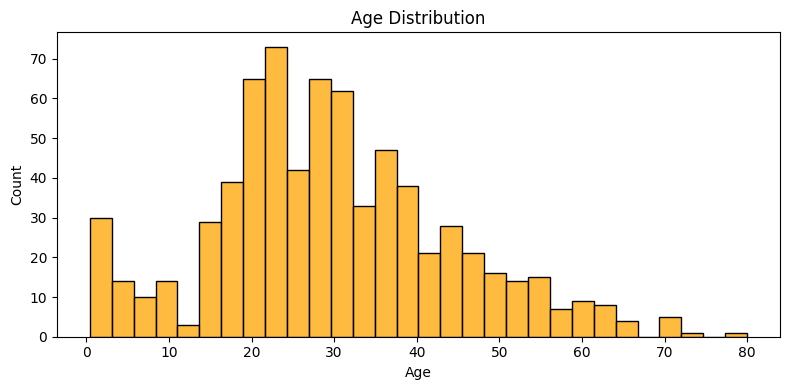

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=30, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### b) Survival Count by Gender

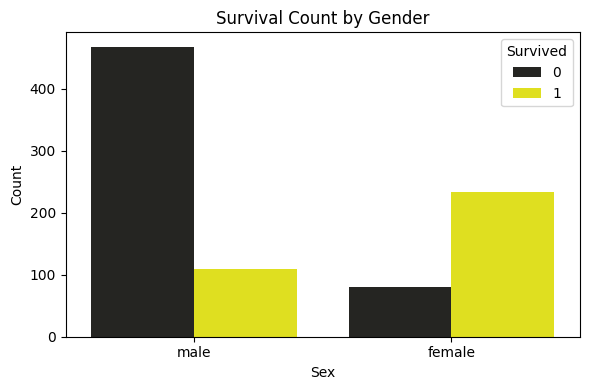

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='dark:yellow')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### c) Correlation heatmap of numeric features

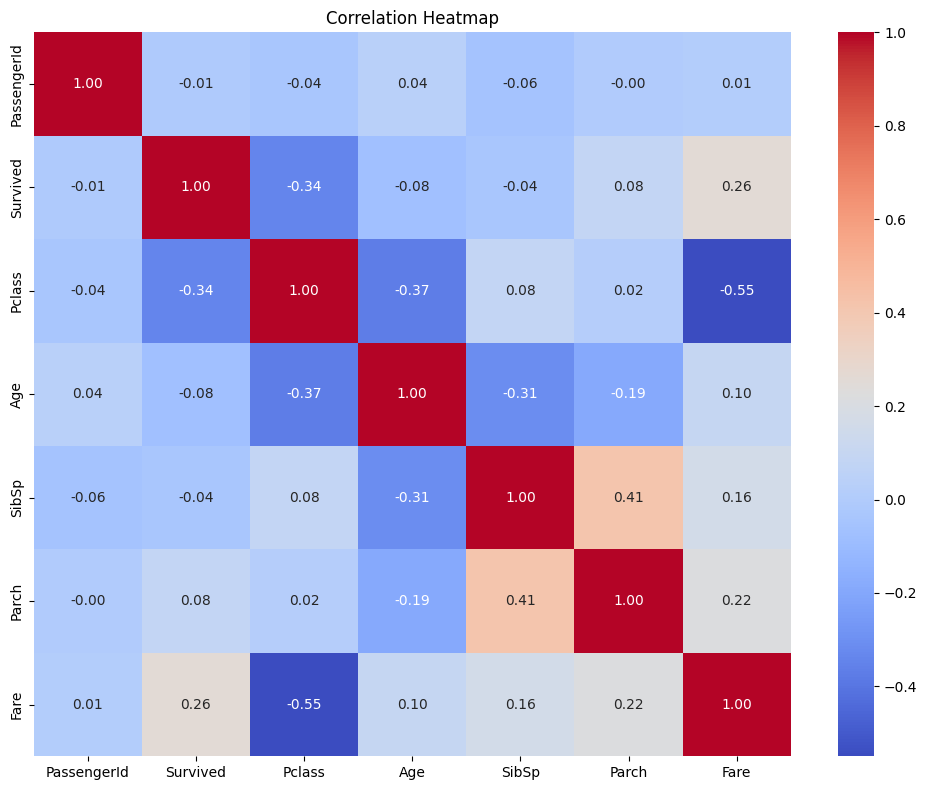

In [16]:
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    corr = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for correlation heatmap.")

## 7. Documented Findings

- **Total Passengers:** 891  
- **Key Features:** Survived, Pclass, Age, Sex, Fare, etc.

### Missing Data
| Column   | Missing Values |
|:---------|---------------:|
| Age      |            177 |
| Cabin    |            687 |
| Embarked |              2 |

### Insights

1. **Age Distribution**  
   - Right‑skewed; most passengers were between **20 and 40** years old.

2. **Survival by Gender**  
   - **Female** passengers had a significantly higher survival rate than **male** passengers.

3. **Numeric Correlations**  
   - **Pclass** (passenger class) is **negatively** correlated with survival.  
   - **Fare** shows a slight **positive** correlation with survival.
